# **California District Housing Prices Analysis**

## **Introduction**

The state of California has long been at the forefront of discussions surrounding housing affordability, urban development, and socio-economic disparities. With recent events highlighting the ongoing housing crisis, including soaring real estate prices and the displacement of communities, it has become increasingly crucial to develop robust tools that can assist in forecasting and managing housing trends.

## **Aim of the Project**

### ***California Median Housing Price Prediction Model by Leveraging 1990 Census Data***

Through this project, I have developed a prediction model that estimates median housing prices across California districts using data from the 1990 Census.

### ***Leveraging the power of Machine Learning***

The potential uses of this model are vast. Urban planners, policymakers, and real estate developers could employ the model to anticipate future housing demands, identify areas at risk of gentrification, and guide equitable development strategies. Additionally, by understanding how past data correlates with current trends, stakeholders can make informed decisions to mitigate the impact of rising housing costs on vulnerable populations.

## **About the data**

### Data collection

Median house prices for *California districts* derived from the 1990 census.  The [dataset](https://www.kaggle.com/datasets/harrywang/housing?resource=download), derived from research by ***Pace, R. Kelley, and Ronald Barry in their 1997 paper "Sparse Spatial Autoregressions,"*** offers a historical lens through which we can understand and project housing market trends. Each observation represents a block group—a small geographical unit that serves as the foundation for building a model with significant practical applications. The block group can be defined as a district for easier interpretation.

### Feature Information

1. **longitude**: A measure of how far west a house is; a higher value is farther west

2. **latitude**: A measure of how far north a house is; a higher value is farther north

3. **housingMedianAge**: Median age of a house within a block; a lower number is a newer building

4. **totalRooms**: Total number of rooms within a block

5. **totalBedrooms**: Total number of bedrooms within a block

6. **population**: Total number of people residing within a block

7. **households**: Total number of households, a group of people residing within a home unit, for a block

8. **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. **medianHouseValue** ***(Target Variable)***: Median house value for households within a block (measured in US Dollars)

10. **oceanProximity**: Location of the house w.r.t ocean/sea. They have the following five categories: 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN' and 'ISLAND'.

## California 1990 Census Analysis

### Import Useful Libraries and data

In [19]:
# data manipulation and numerical calculations
import pandas as pd
import numpy as np
pd.set_option('display.width', 150) # set output width for dataframes
import random as rnd

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [20]:
# read dataset
housing_data = pd.read_csv('data/housing.csv')

In [21]:
# Train-Test Split
from sklearn.model_selection import train_test_split

In [22]:
train_df, test_df = train_test_split(housing_data, test_size=0.2, random_state= 42)

In [23]:
print(f'The training data of independent contains {train_df.shape[0]} observations and {train_df.shape[1]} variables')
print(f'The testing data contains {test_df.shape[0]} observations and {test_df.shape[1]} variables')

The training data of independent contains 16512 observations and 10 variables
The testing data contains 4128 observations and 10 variables


#### **Understanding the data**

In [24]:
print(f'The data contains {train_df.shape[0]} rows and {train_df.shape[1]} columns')

The data contains 16512 rows and 10 columns


In [25]:
train_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  \
14196    -117.03     32.71                33.0       3126.0           627.0      2300.0       623.0         3.2596            103000.0   
8267     -118.16     33.77                49.0       3382.0           787.0      1314.0       756.0         3.8125            382100.0   
17445    -120.48     34.66                 4.0       1897.0           331.0       915.0       336.0         4.1563            172600.0   
14265    -117.11     32.69                36.0       1421.0           367.0      1418.0       355.0         1.9425             93400.0   
2271     -119.80     36.78                43.0       2382.0           431.0       874.0       380.0         3.5542             96500.0   

      ocean_proximity  
14196      NEAR OCEAN  
8267       NEAR OCEAN  
17445      NEAR OCEAN  
14265      NEAR OCEAN  
2271           INLAND

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


> **Observations:**
> 1. Categorical Variables: *ocean_proximity* is the only variable of dtype 'object'
> 2. Numerical Variables: All other variables are numerical of dtype 'float64'

#### **Duplication Check**

In [27]:
train_df.nunique()

longitude               833
latitude                845
housing_median_age       52
total_rooms            5470
total_bedrooms         1816
population             3639
households             1706
median_income         10932
median_house_value     3675
ocean_proximity           5
dtype: int64

In [80]:
print("The Categories for ocean_proximity are:")
classes = train_df['ocean_proximity'].unique()
print(classes)

The Categories for ocean_proximity are:
['NEAR OCEAN' 'INLAND' '<1H OCEAN' 'NEAR BAY' 'ISLAND']


> **Observations:**
> * High amount of unique values for the numerical variables.
> * 5 categories for ocean_proximity

#### **Missing values Calculations**

In [29]:
train_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

> **Observation:** There are no missing values in the training data. There could be some in the testing data and should be accounted for in the preprocessing pipelines using imputation

### EDA

In [18]:
# Separate features for easier use in analysis
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'total_rooms', 'population', 'households', 'median_income']
categorical_features = ["ocean_proximity"]
target = "median_house_value"

#### Summary Statistics

In [32]:
summary = train_df.drop(columns=[target], axis=1).describe().T
summary['range'] = summary['max'] - summary['min']
summary

count         mean          std       min        25%        50%          75%         max       range
longitude           16512.0  -119.582290     2.005654 -124.3500  -121.8100  -118.5100  -118.010000   -114.3100     10.0400
latitude            16512.0    35.643149     2.136665   32.5500    33.9300    34.2600    37.720000     41.9500      9.4000
housing_median_age  16512.0    28.608285    12.602499    1.0000    18.0000    29.0000    37.000000     52.0000     51.0000
total_rooms         16512.0  2642.004784  2174.646744    2.0000  1454.0000  2129.0000  3160.000000  39320.0000  39318.0000
total_bedrooms      16512.0   538.496851   419.007096    1.0000   296.7500   437.0000   647.000000   6445.0000   6444.0000
population          16512.0  1426.453004  1137.056380    3.0000   789.0000  1167.0000  1726.000000  35682.0000  35679.0000
households          16512.0   499.986919   380.967964    1.0000   280.0000   410.0000   606.000000   6082.0000   6081.0000
median_income       16512.0     3.880754     1.904294    0.4999     2.5667     3.5458     4.773175     15.0001     14.5002

> **Observations:**
> 
> 1. On average, the **housing_median_age** in a district is ~28 with ~12 standard deviation. There potentially might be outliers.
> 2. On average, the **total rooms** in a district are ~2.6k with high standard deviation. The range shows a huge difference between min and max as max values show ~39k shows the presence of outliers. The distibution might be right skewed.
> 3. On average, the **total bedrooms** in a district  are ~0.5k with high standard deviation. The range shows a huge difference between min and max as max values show ~5k shows the presence of outliers. The distibution might be right skewed.
> 4. On average, the **households** in a district  are ~0.5k with high standard deviation. The range shows a huge difference between min and max as max values show ~6k shows the presence of outliers. The distibution might be right skewed.
> 5. On average, the **populations** in a district  are ~1.4k with high standard deviation. The range shows a huge difference between min and max as max values show ~35k shows the presence of outliers. The distibution might be right skewed.
> 6. On average, the **median_income** in a district is ~3.8 (in 10,000 USD) with ~1.9 (in 10,000 USD) standard deviation. The range shows a huge difference between min and max as max values show ~14.5 (in 10,000 USD) shows the presence of outliers. The distibution might be right skewed.

Skewed distributions and outliers can be accomodated for modelling through the following ways:
- Remove few outliers.
- Apply log transformation for getting approximately normal distribution. Be aware of zero values in the skewed features.
- Apply scaling for reducing the influence of certain features in the prediction model.

#### Univariate Analysis

##### Target Variable Analysis

median_house_value Skewness: 0.977 


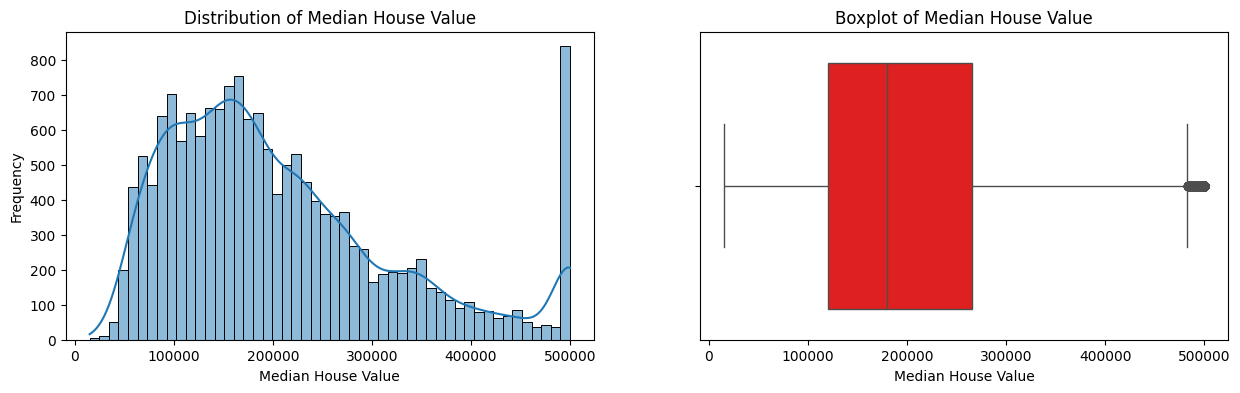

In [45]:
print(f"{target} Skewness: {round(train_df[target].skew(), 3)} ")
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
sns.histplot(train_df[target], kde=True, bins=50)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.boxplot(x=train_df[target], color='red')
plt.title('Boxplot of Median House Value')
plt.xlabel('Median House Value')
plt.show()

> Observations:
> 1. The distribution is relatively normal with no skewed data.
> 2. There are over 800 districts with median house value close to 500,000 USD creating another peak. 

Resolving the isssue through either removing these values and considering them as outliers or do feature engineering for creating bins or labelling them.

##### Numerical Features

In [55]:
def plot_univars(df, num_cols, nbins):
    '''
    Plots histogram and boxplot of the counts of the variables
    
    Args:
        df (Dataframe): dataframe containing the variables
        cols (List[str]): List of string of column names to be plotted
        nbins (int): The number of bins in histogram
    
    Returns: None  
    '''
    for col in num_cols:
        print(f'Measure of skewnesss for {col} : {round(df[col].skew(), 3)}') # Calculate skewness
        plt.figure(figsize = (15, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=nbins) # Histogram for univariate counts
        plt.ylabel('count')
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col]) # Boxplot for univariate counts
        
        plt.show()

Measure of skewnesss for longitude : -0.288


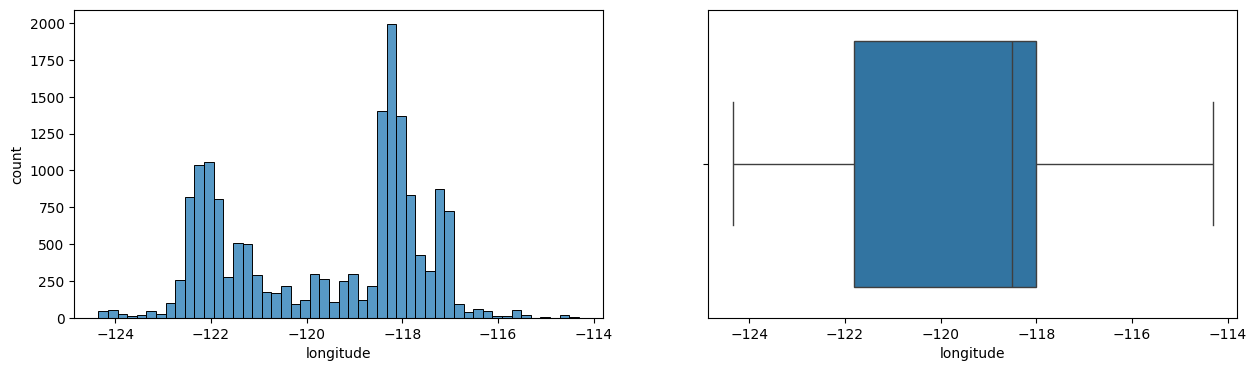

Measure of skewnesss for latitude : 0.462


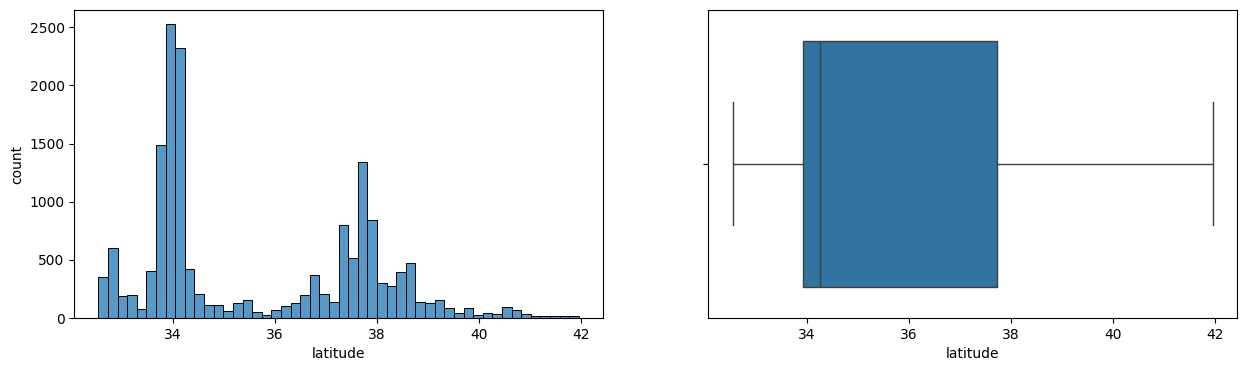

Measure of skewnesss for housing_median_age : 0.063


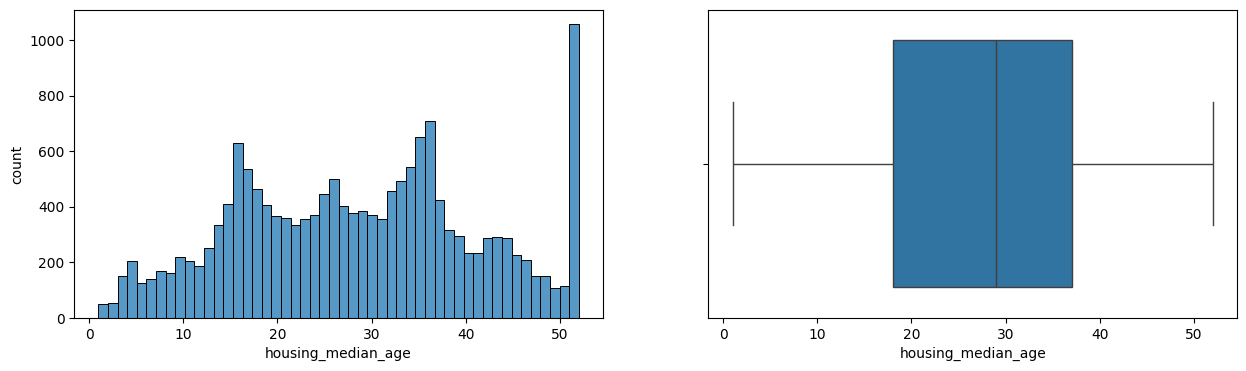

Measure of skewnesss for total_bedrooms : 3.416


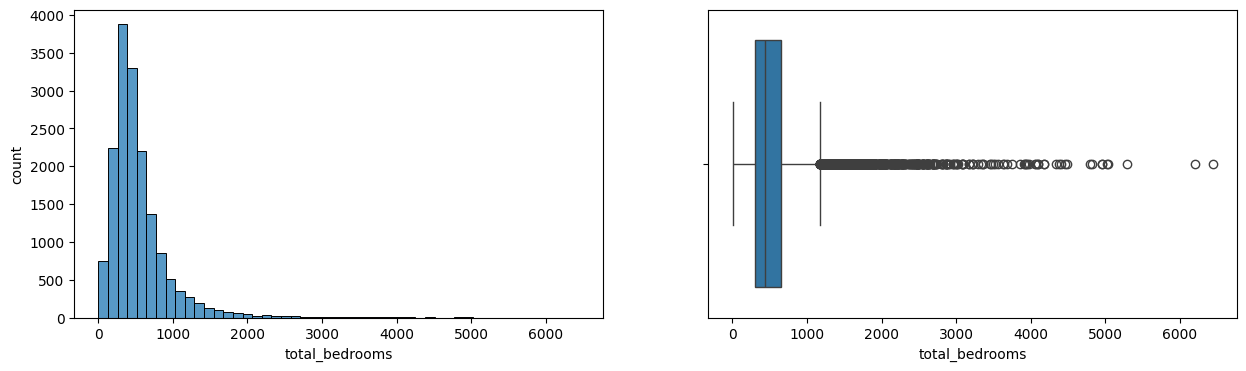

Measure of skewnesss for total_rooms : 4.091


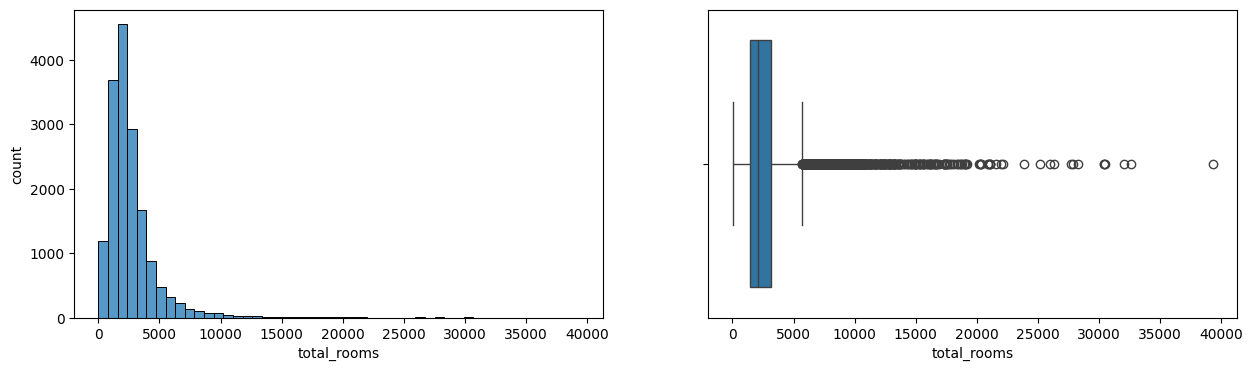

Measure of skewnesss for population : 5.276


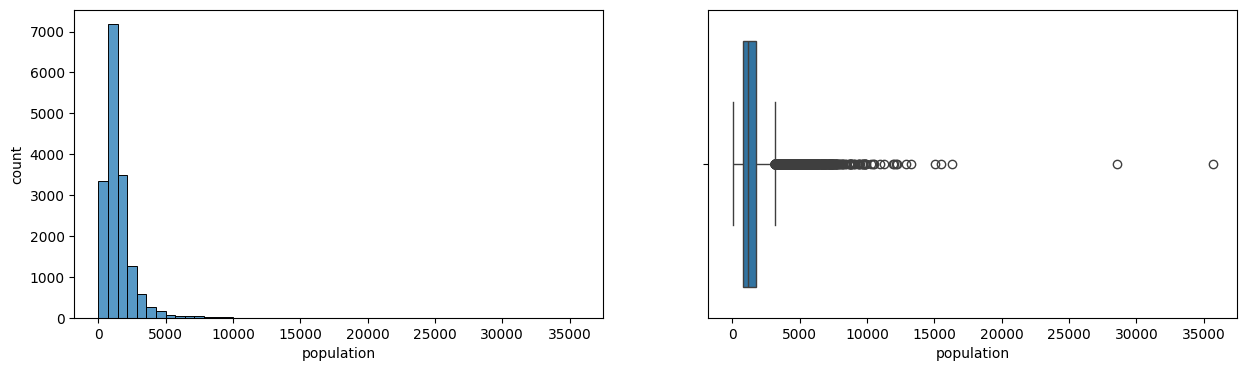

Measure of skewnesss for households : 3.387


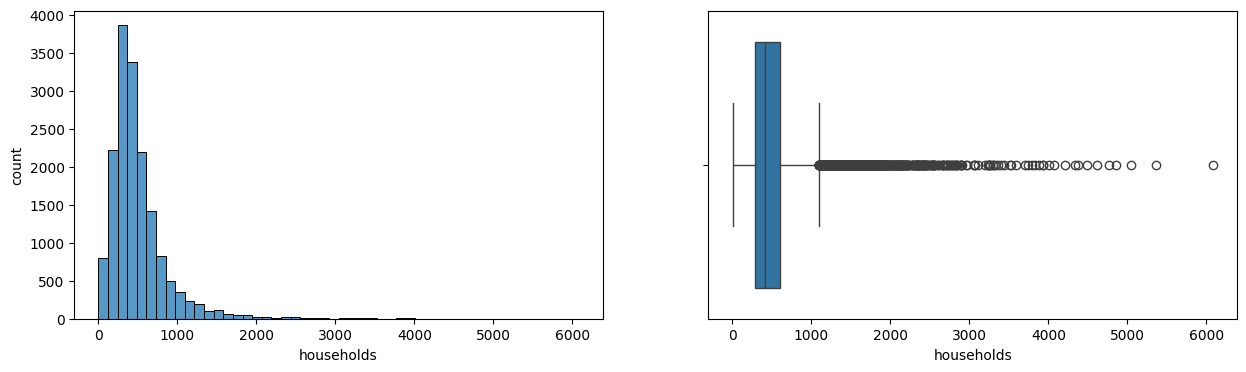

Measure of skewnesss for median_income : 1.634


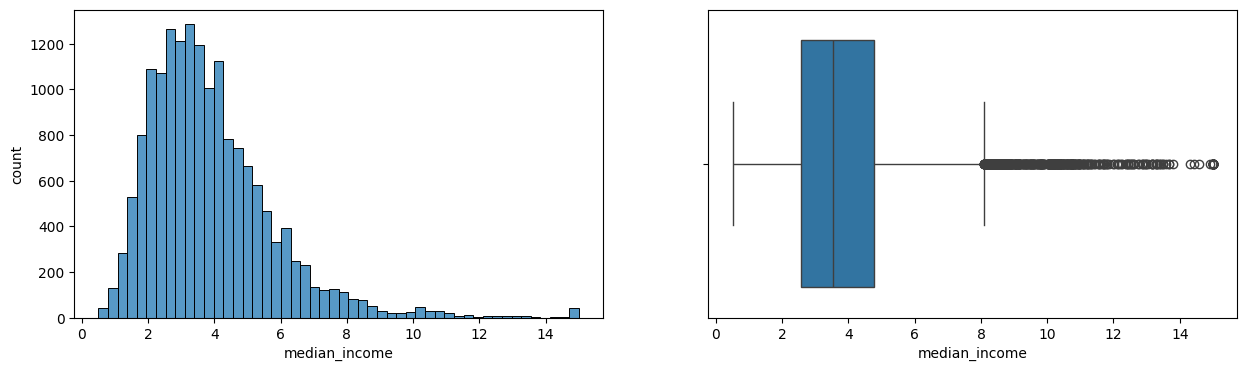

In [56]:
plot_univars(train_df, numerical_features, 50)

> **Observations:**
> 1. The distribution for **latitude** shows two peaks with no outliers. 
> 2. The distribution for **longitude** shows multiple peaks with no outliers. 
> 3. The distribution for **housing median age** also has mulitple peaks with no outliers.
> 4. The distribution for total number of **bedrooms** is right skewed with significant number of outliers.
> 5. The distribution for total number of **rooms** is right skewed with significant number of outliers.
> 6. The distribution for **population** in each district is right skewed with significant number of outliers.
> 7. The distribution for number of **households** in each district is right skewed with significant number of outliers.
> 8. The distribution for the **median income** in each district is slightly right skewed with significant number of outliers.

The multiple peaks can be resolved in the one or more of the following ways:
- Transform data using log or square root function to minimize the impact of multiple peaks.
- Converting the continous features into categorical bins or ranges.
- Clustering the values using clustering algorithms or converting into separate gaussian distributions.
- Using ensembling models for handling complex data.

The skewness can be handled by introducing log, square root or quantile transformation of the skewed distribution.

##### Categorical Features

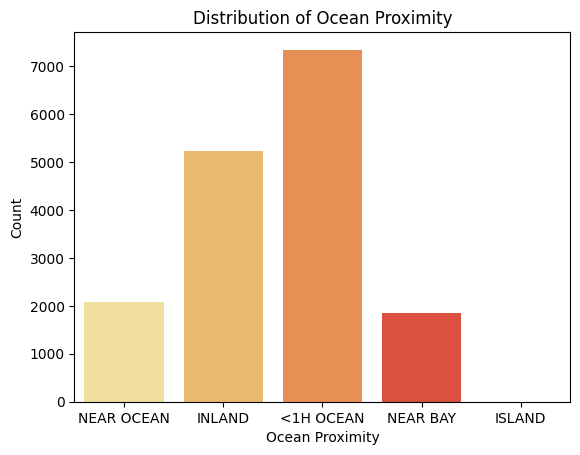

In [61]:
sns.countplot(x='ocean_proximity', data=train_df, palette='YlOrRd')
plt.title('Distribution of Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.show()

In [63]:
train_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [65]:
# Check the observations located on islands
train_df[train_df['ocean_proximity'] == 'ISLAND']

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  \
8318    -118.48     33.43                29.0        716.0           214.0       422.0       173.0         2.6042            287500.0   
8314    -118.32     33.35                27.0       1675.0           521.0       744.0       331.0         2.1579            450000.0   
8316    -118.32     33.33                52.0       2127.0           512.0       733.0       288.0         3.3906            300000.0   
8315    -118.33     33.34                52.0       2359.0           591.0      1100.0       431.0         2.8333            414700.0   

     ocean_proximity  
8318          ISLAND  
8314          ISLAND  
8316          ISLAND  
8315          ISLAND

> **Observations:**
> 1. The counts for **ocean_proximity** categorical variable follow the following descending order - ***Less than 1H OCEAN** > **INLAND** > **NEAR OCEAN** >= **NEAR BAY** > **ISLAND***
> 2. There are almost a similar number of observations for **NEAR BAY** and **NEAR OCEAN**.
> 3. **ISLAND** has a low number of observations and could impact the model by introducting noise.

#### Bivariate Analysis - Interaction with Target Variable

##### Numerical Columns

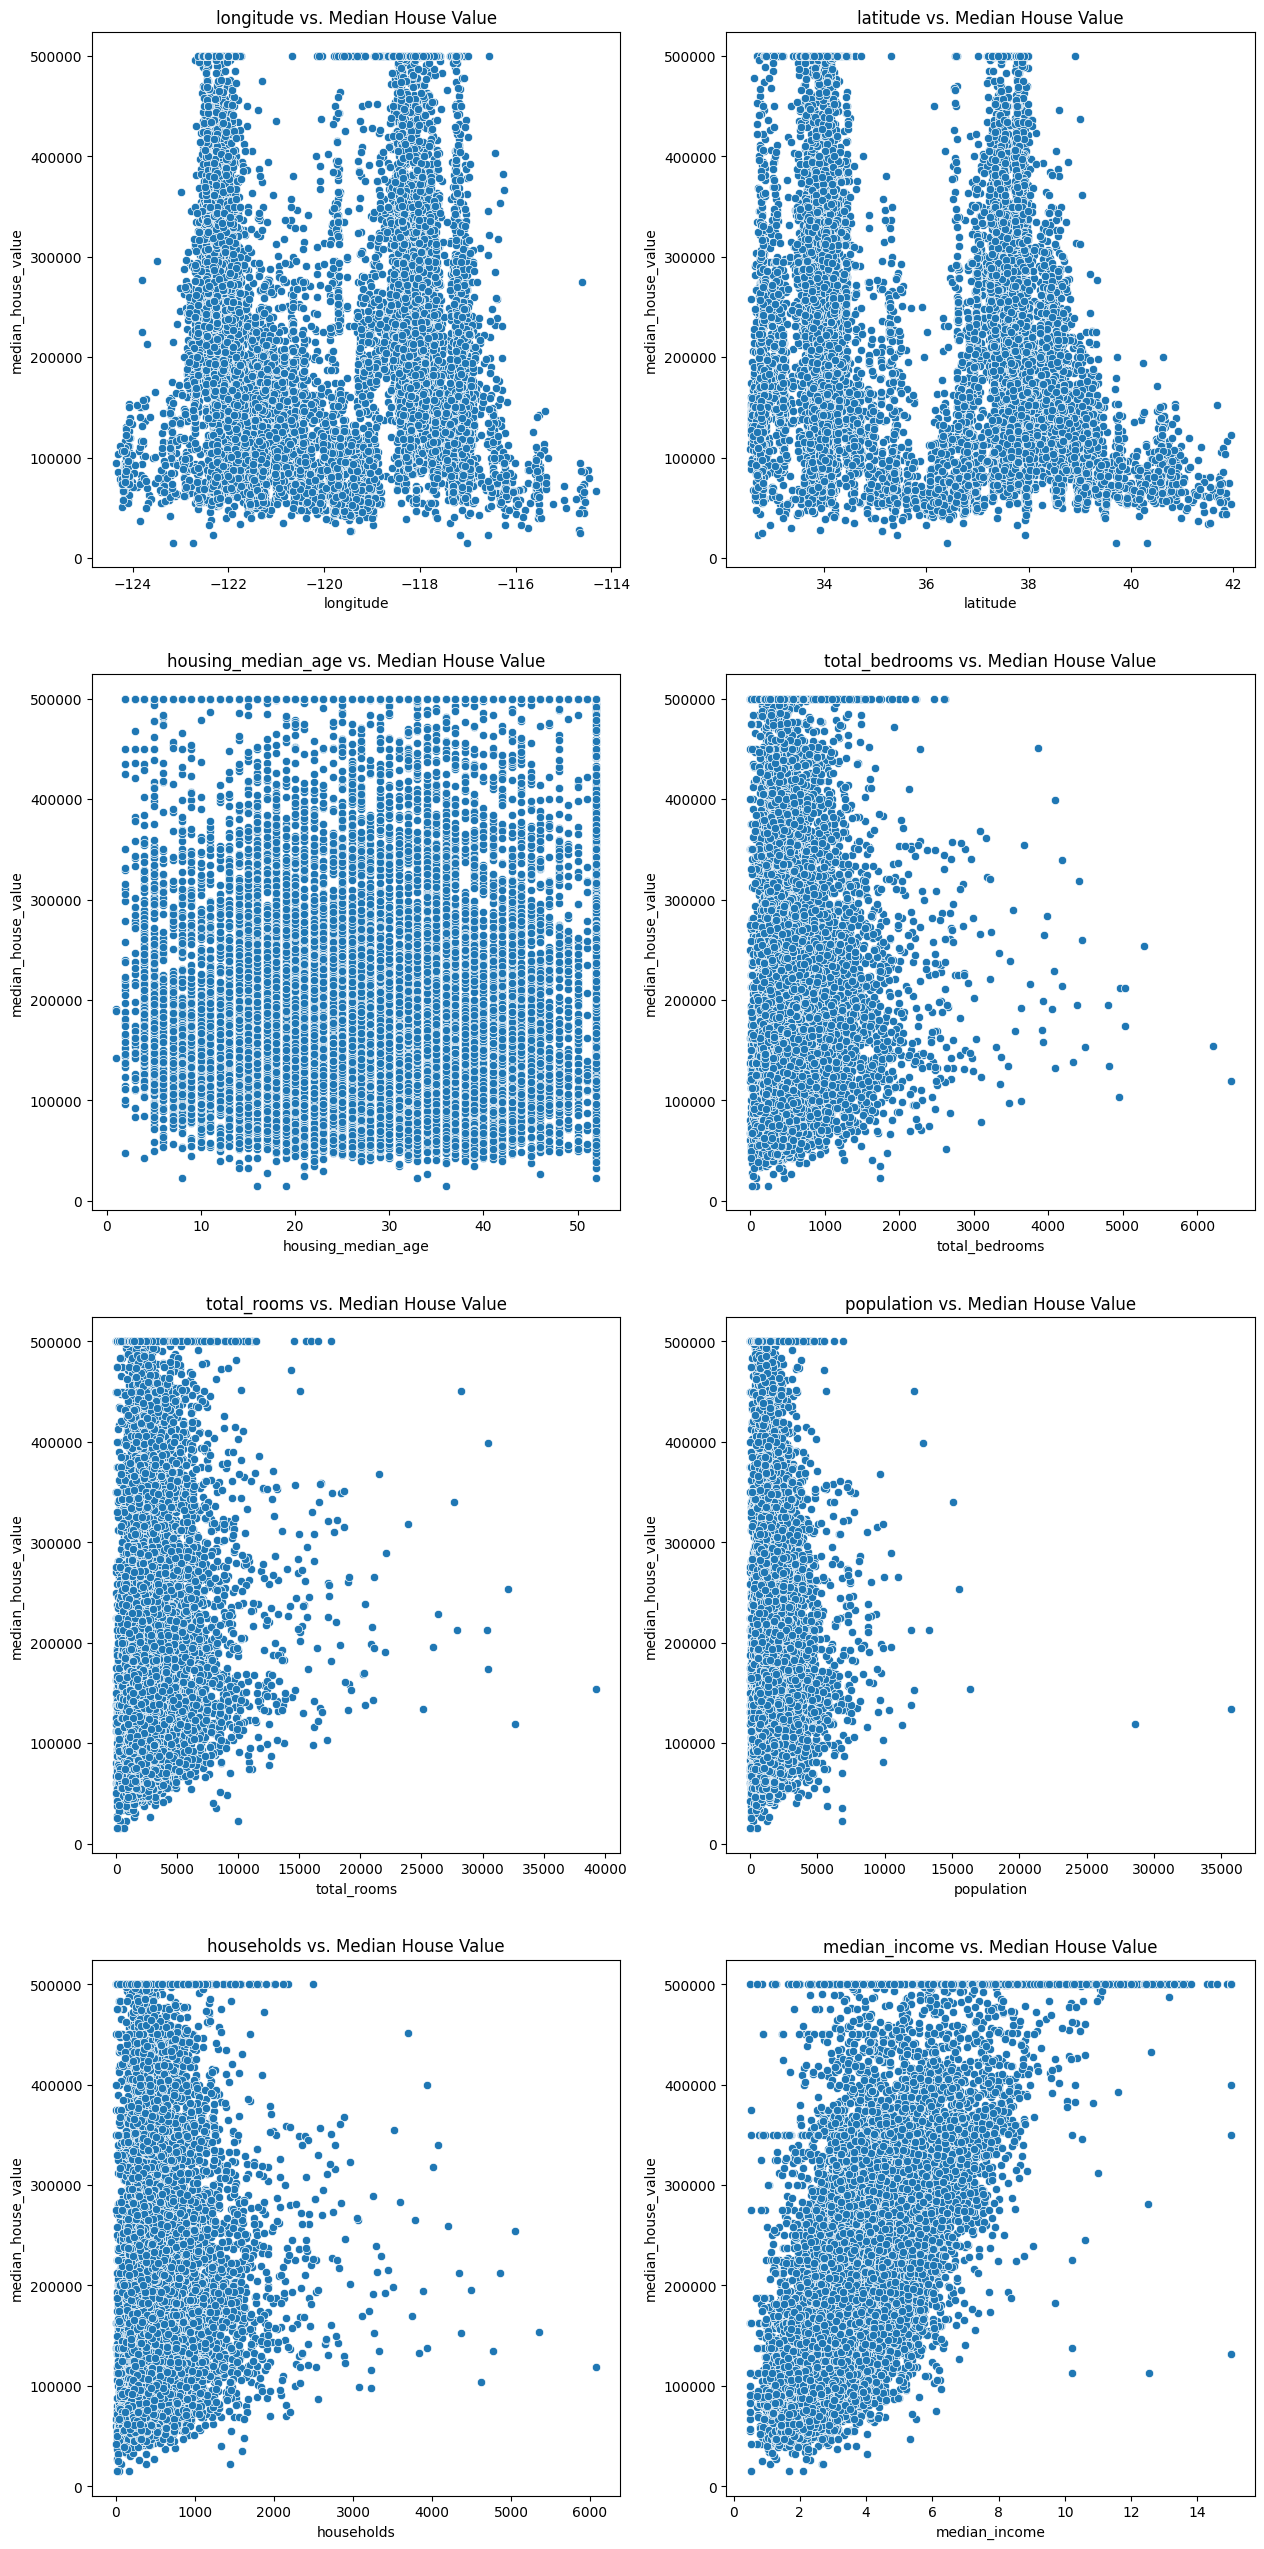

In [72]:
# Check for the relationship between the numerical columns and the target variable
plt.figure(figsize = (15, 32))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(x=train_df[feature], y=train_df[target])
    plt.title(f'{feature} vs. Median House Value')
plt.show()

In [74]:
corr_matrix = train_df.drop(columns=categorical_features, axis=1).corr()
corr_matrix[target]

longitude            -0.046349
latitude             -0.142983
housing_median_age    0.103706
total_rooms           0.133989
total_bedrooms        0.047980
population           -0.026032
households            0.063714
median_income         0.690647
median_house_value    1.000000
Name: median_house_value, dtype: float64

**Observations for feature relationship with target variable:**
1. There is no clear linear association with **longitude** or **latitude**. The values seem densly populated in around the values of -122 & -118 for longitude, and 34 & 38 for latitude.
2. There is no linear association with **median house age**. They seem independent to each other as the data points are uniformly distibuted all over the scatterplot.
3. The data points are densily located in the lower values for the following features - **total_bedrooms, total_rooms, households** and **population**. The values are the almost uniformly distributed over the target variable.
4. There is a positive linear association with **median income**.

Resolving non-linear relationships in one or more of the following ways:
- Removing irrelvant features using feature selection or engineer features.
- Cluster or binning the features that are densely populated at some values.
- Use ensemble models like bagging and boosting models to capture non-linear relationships
- Feature selection can be done through LASSO regression models or exhaustive selection algorithms.

##### Categorical Columns

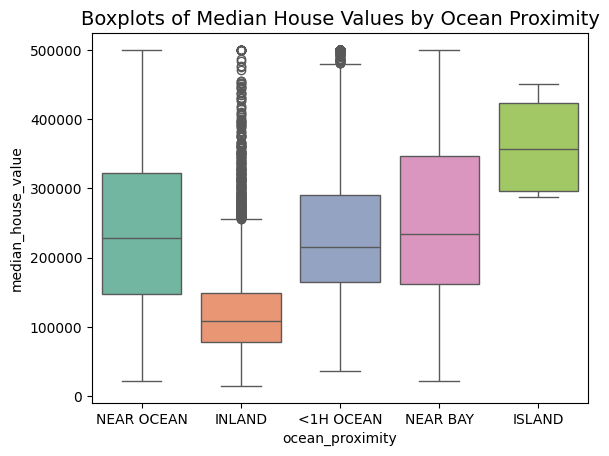

In [91]:
# Boxplots of target variable vs categorical features
sns.boxplot(x='ocean_proximity', y='median_house_value', data=train_df, palette='Set2')
plt.title('Boxplots of Median House Values by Ocean Proximity', fontsize=14)
plt.show()

> **Observations:**
> 1. The median house values increase with the proximity to the ocean.
> 2. The distributions for median house values for NEAR OCEAN and NEAR BAY are similar. Consider merging these categories to reduce model complexity.
> 3. The distribution for median house values for INLAND is right skewed with a lot of outliers.
> 4. The distribution for median house values for LESS THAN 1H OCEAN is right skewed with a lot of outliers.

Reduce the impact of the skewed data and outliers on the prediction model:
- Using ensembles techniques will handle poor predictions of the skewed values by using weak learners and apply a cost to the poorly predicted target values during model training.

#### Mutivariate Analysis

##### Numerical features : Collinearity

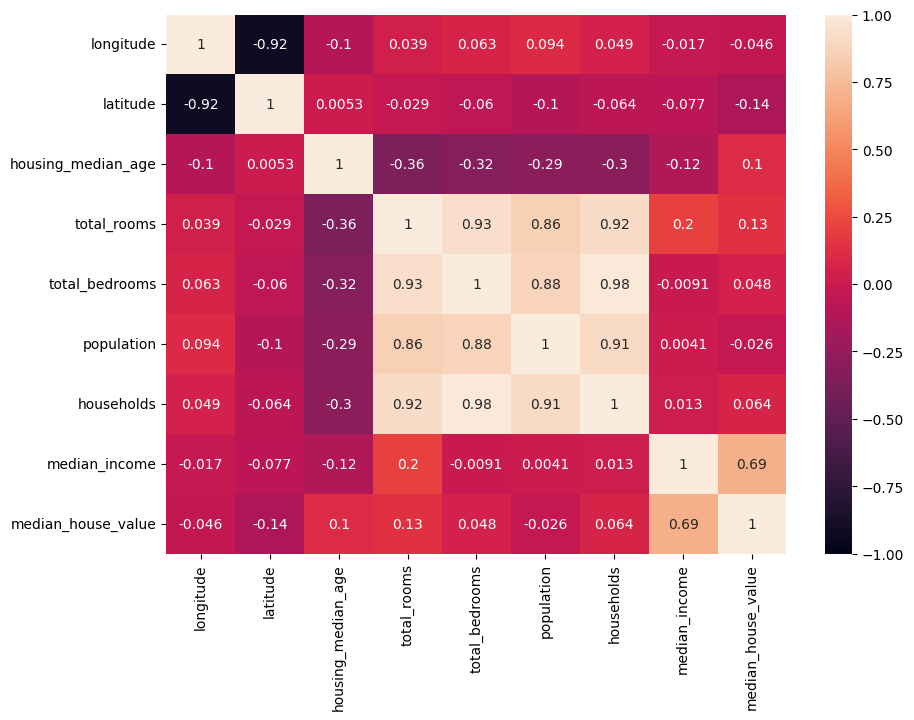

In [103]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1)
plt.show()

##### Numerical with Categorical Features

<Figure size 3200x3200 with 0 Axes>

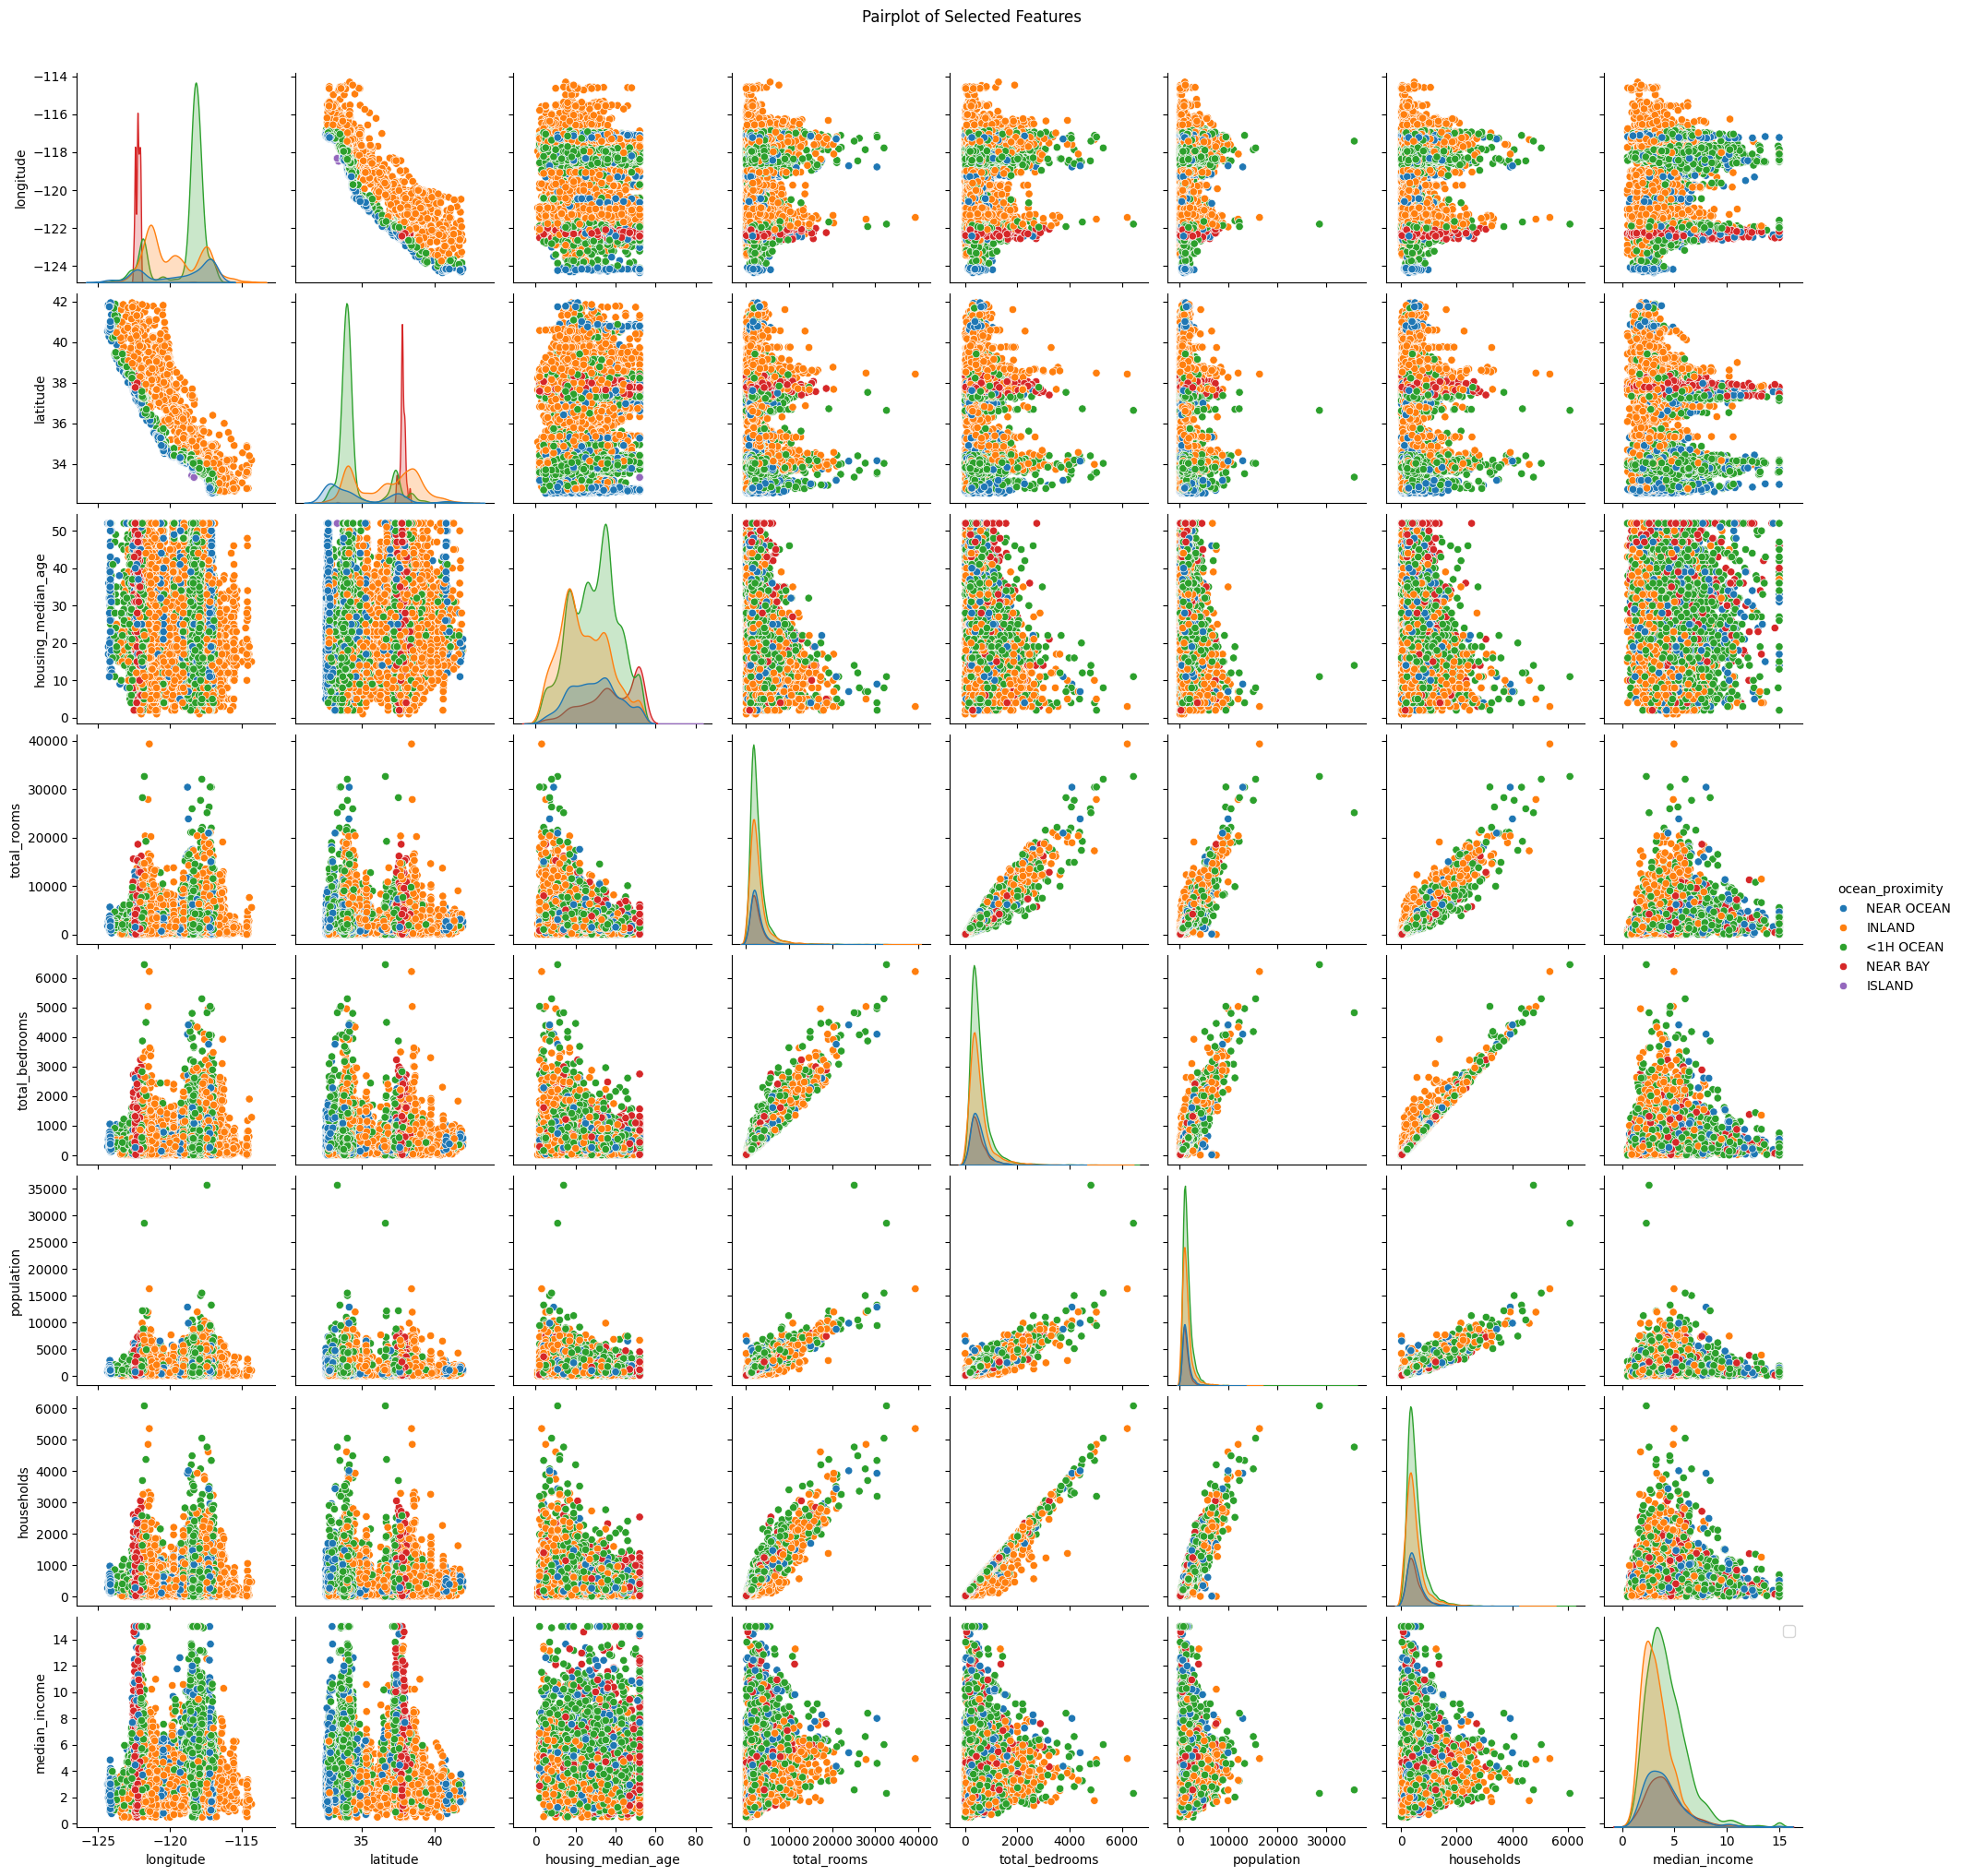

In [100]:
plt.figure(figsize = (32, 32))
sns.pairplot(train_df.drop(columns=target), diag_kind='kde', hue = categorical_features[0], palette='tab10')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.legend(fontsize='large')
plt.show()

**Observations with *ocean_proximity* categories:**
- ISLAND observations for ocean_proximity cannot be visualized due to the low number of observations.
KDE plots
1. latitude and longitude show multiple peaks for each category. Their distribution is also not in a 

In [ ]:
multi_variate_drop = categorical_features + ['median_house_value']
multi_variate_drop

['ocean_proximity', 'median_house_value']

#### Data transformation

Transform all highly skewed variables.

In [ ]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data = data.drop(col,axis=1) # Drop the original columns from original data
    return data

In [ ]:
train_df = log_transform(train_df, numeric_features[-3:])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitude                     20640 non-null  float64
 1   latitude                      20640 non-null  float64
 2   housing_median_age            20640 non-null  float64
 3   total_rooms                   20640 non-null  float64
 4   total_bedrooms                20433 non-null  float64
 5   population                    20640 non-null  float64
 6   households                    20640 non-null  float64
 7   median_income                 20640 non-null  float64
 8   median_house_value            20640 non-null  float64
 9   ocean_proximity               20640 non-null  object 
 10  bedrooms_per_households_log   20433 non-null  float64
 11  rooms_per_households_log      20640 non-null  float64
 12  population_per_household_log  20640 non-null  float64
dtypes

### Feature Engineering

As each observation of the housing data denotes a single district of california, we can do feature engineering for more meaningful features.

The following features could be used:
* Calculate the average number of bedrooms per household
* Calculate the average number of rooms per household
* Calculate the average number of people per household

In [ ]:
train_df = train_df.assign(bedrooms_per_households = train_df['total_bedrooms'] / train_df['households'])
train_df = train_df.assign(rooms_per_households = train_df['total_rooms'] / train_df['households'])
train_df = train_df.assign(population_per_household = train_df['population'] / train_df['households'])

train_df[['bedrooms_per_households', 'rooms_per_households', 'population_per_household']]

bedrooms_per_households  rooms_per_households  population_per_household
0                     1.023810              6.984127                  2.555556
1                     0.971880              6.238137                  2.109842
2                     1.073446              8.288136                  2.802260
3                     1.073059              5.817352                  2.547945
4                     1.081081              6.281853                  2.181467
...                        ...                   ...                       ...
20635                 1.133333              5.045455                  2.560606
20636                 1.315789              6.114035                  3.122807
20637                 1.120092              5.205543                  2.325635
20638                 1.171920              5.329513                  2.123209
20639                 1.162264              5.254717                  2.616981

[20640 rows x 3 columns]

In [ ]:
def plot_log_transformed(df, num_cols):
    for col in num_cols:
        print(col)
        print('Skew :', round(df[col].skew(), 2)) # Calculate skewness
        plt.figure(figsize = (15, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True); # Density plot for log transformed features
        plt.ylabel('count')
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col]) # Boxplot for univariate counts
        plt.show()

bedrooms_per_households_log
Skew : 6.4


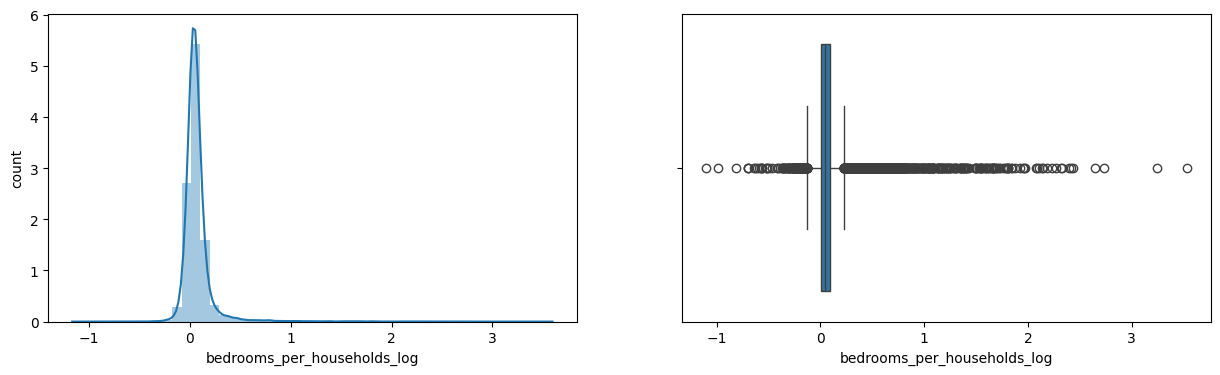

rooms_per_households_log
Skew : 0.87


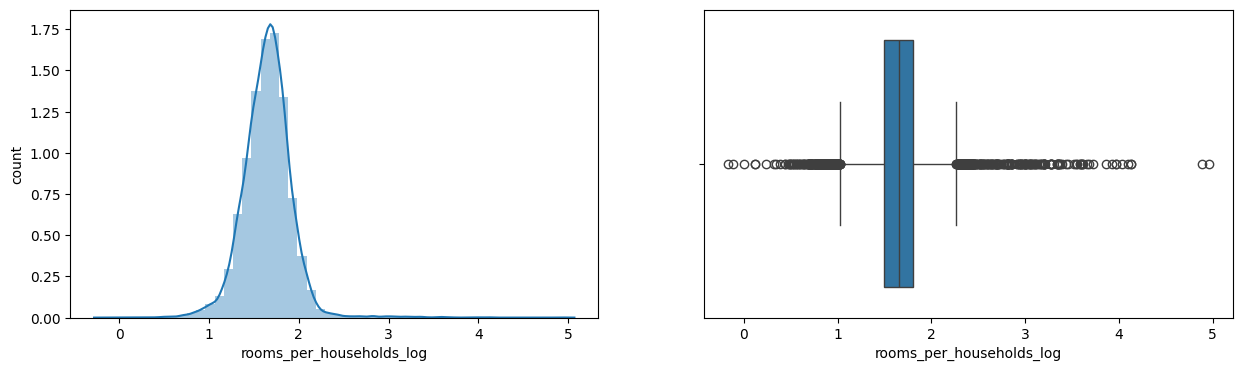

population_per_household_log
Skew : 2.13


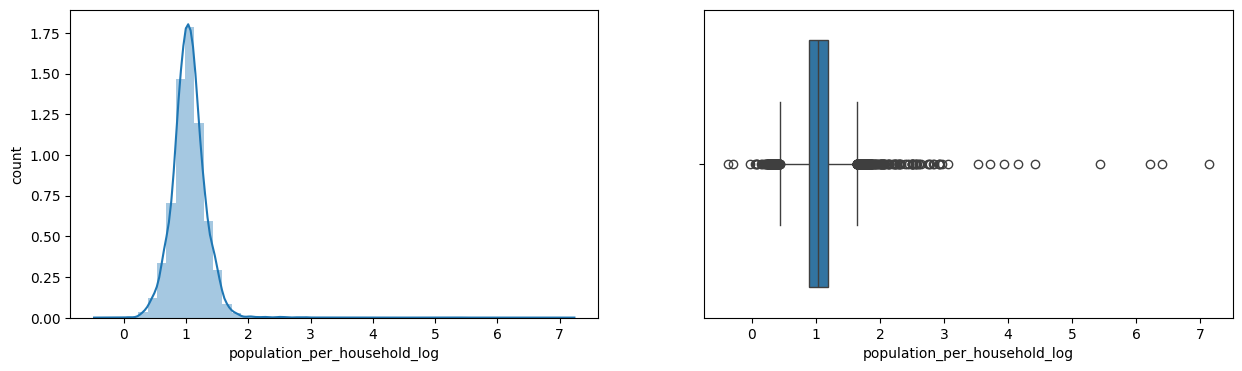

In [ ]:
plot_log_transformed(train_df, numeric_features[-3:])

##### Final Data and Splitting

In [ ]:
num_std_features = ['longitude', 'latitude', 'housing_median_age']
num_robust_features = ['total_rooms', 'population', 'households', 'median_income', 'rooms_per_households_log', 'population_per_household_log']
num_imp_robust_features = ['total_bedrooms', 'bedrooms_per_households_log']
cat_features = ["ocean_proximity"]
# drop_features = ["total_rooms". "total_bedrooms", "population", "households"]
target = "median_house_value"

assert set(num_std_features + num_robust_features + num_imp_robust_features + cat_features + [target]) == set(train_df.columns)

In [ ]:
# Model Selection
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X_train = train_df.drop(target, axis=1)
y_train = train_df[target]
X_test = test_df.drop(target, axis=1)
y_test = test_df[target]

### Data Preprocessing

In [ ]:
# Preprocessing data functions and Transformers
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.impute import SimpleImputer

# Pipelines and Tranformers
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

In [ ]:
# Make tranformers for each feature
num_std_transformer = make_pipeline(
    StandardScaler()
)

num_robust_transformer = make_pipeline(
    RobustScaler()
)

num_imp_robust_transformer = make_pipeline(
    SimpleImputer(strategy='median', fill_value='missing'),
    RobustScaler()
)

cat_transformer = make_pipeline(
    OneHotEncoder(handle_unknown='ignore', sparse=False)
)

In [ ]:
# Make Preprocessor
preprocessor = make_column_transformer(
    (num_std_transformer, num_std_features),
    (num_robust_transformer, num_robust_features),
    (num_imp_robust_transformer, num_imp_robust_features),
    (cat_transformer, cat_features),
)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude',
                                  'housing_median_age']),
                                ('pipeline-2',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler())]),
                                 ['total_rooms', 'population', 'households',
                                  'median_income', 'rooms_per_households_log',
                                  'population_per_household_log']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='median')),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['total_bedrooms',
                                  'bedrooms_per_households_log']),
                                ('pipeline-4',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['ocean_proximity'])])

In [ ]:
# Apply transformations
transformed_X_train = pd.DataFrame(preprocessor.fit_transform(X_train))
# New Columns for OHE columns
new_cols = X_train.columns.tolist() + preprocessor.named_transformers_['pipeline-4'].get_feature_names_out().tolist()
new_cols.remove('ocean_proximity')
new_cols

NameError: name 'pd' is not defined

In [ ]:
transformed_X_train.columns = new_cols
transformed_X_train

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  bedrooms_per_households_log  \
0       1.272587 -1.372811            0.348490     0.584408        1.209178    0.653374   -0.129709      -0.137986                     0.899862   
1       0.709162 -0.876696            1.618118     0.734467        0.156884    1.061350    0.120872      -0.510032                    -1.607500   
2      -0.447603 -0.460146           -1.952710    -0.135991       -0.268943   -0.226994    0.276686       0.244345                    -0.112981   
3       1.232698 -1.382172            0.586545    -0.415006        0.267876   -0.168712   -0.726634      -0.870412                     1.162028   
4      -0.108551  0.532084            1.142008     0.148300       -0.312700   -0.092025    0.003807       0.583410                    -0.675157   
...          ...       ...                 ...          ...             ...         ...         ...            ...                          ...   
16507   0.808883 -0.872016            0.507194    -0.468347       -0.543223   -0.592025    1.279960       0.510520                     0.244802   
16508   1.073144 -0.759688            0.348490     0.559789        0.625400    0.119632   -0.224702       0.879782                     1.086061   
16509   0.599469 -0.755007            0.586545    -0.016413        0.628602    0.358896   -0.277094      -0.883476                     0.558621   
16510  -1.185540  0.906510           -1.079841     0.847597        0.651014    0.457055    0.985010       0.648387                     0.401984   
16511  -1.414898  0.995437            1.856173     1.229191        1.549626    2.552147   -0.439751      -1.397017                    -0.964191   

       rooms_per_households_log  population_per_household_log  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                      0.542470                     -0.467912                        0.0                     0.0                     0.0   
1                      0.999286                     -0.088879                        0.0                     0.0                     0.0   
2                     -0.302641                     -0.707905                        0.0                     0.0                     0.0   
3                     -0.199857                     -0.166766                        0.0                     0.0                     0.0   
4                     -0.017131                      0.873095                        0.0                     1.0                     0.0   
...                         ...                           ...                        ...                     ...                     ...   
16507                 -0.673804                     -1.398952                        1.0                     0.0                     0.0   
16508                  0.379729                      2.137142                        0.0                     1.0                     0.0   
16509                  0.376874                      0.320513                        1.0                     0.0                     0.0   
16510                  0.456817                      0.198095                        1.0                     0.0                     0.0   
16511                  2.506781                      0.101012                        0.0                     0.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                           0.0                         1.0  
1                           0.0                         1.0  
2                           0.0                         1.0  
3                           0.0                         1.0  
4                           0.0                         0.0  
...                         ...                         ...  
16507                       0.0                         0.0  
16508                       0.0                         0.0  
165

### Model Building

In [ ]:
# @title Change Scoring Metric
scoring_metric = "neg_mean_absolute_error"
# scoring_metric = "neg_mean_squared_error"
# scoring_metric = "r2"
# scoring_metric = "neg_root_mean_squared_error"

In [ ]:
results_dict = {}  # dictionary to store all the results

In [ ]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [ ]:
# Baseline model
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor()
pipe = make_pipeline(preprocessor, dummy)
results_dict["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True, scoring=scoring_metric
)
results_df = pd.DataFrame(results_dict).T
results_df

fit_time         score_time                test_score               train_score
dummy  0.038 (+/- 0.008)  0.011 (+/- 0.002)  -91394.675 (+/- 948.272)  -91390.735 (+/- 302.188)

In [ ]:
# @title Regressor Hyper-parameters
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression hyperparameters
linear_params = {}

# Ridge Regression hyperparameters
ridge_params = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0]
}

# Decision Tree Regression hyperparameters
dt_params = {
    'decisiontreeregressor__max_depth': [None, 5, 10],
    'decisiontreeregressor__min_samples_split': [2, 5, 10],
    'decisiontreeregressor__min_samples_leaf': [1, 2, 4]
}

# Random Forest Regression hyperparameters
rf_params = {
    'randomforestregressor__n_estimators': [100, 200, 300],
    'randomforestregressor__max_depth': [None, 5, 10],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4],
    'randomforestregressor__max_features': ['sqrt', 'log2']

}

# Support Vector Regression hyperparameters
svr_params = {
    'svr__C': [0.1, 1.0, 10.0],
    "svr__gamma": [0.1, 1.0, 10],
    'svr__kernel': ['linear', 'rbf'],
    'svr__epsilon': [0.1, 0.2, 0.3]
}

# Gradient Boosting Regression hyperparameters
gb_params = {
    'gradientboostingregressor__n_estimators': [100, 200, 300],
    'gradientboostingregressor__learning_rate': [0.01, 0.1, 1.0],
    'gradientboostingregressor__max_depth': [3, 5, 7],
    'gradientboostingregressor__subsample': [0.5, 0.8, 1.0]
}

# Bagging Regressor hyperparameters
bagging_params = {
    'baggingregressor__n_estimators': [10, 50, 100],
    'baggingregressor__max_samples': [0.5, 0.8, 1.0],
    'baggingregressor__max_features': [0.5, 0.8, 1.0],
    'baggingregressor__bootstrap': [True, False],
    'baggingregressor__bootstrap_features': [True, False]
}

In [ ]:
# @title Regression Pipelines
# Create the regression pipelines
linear = make_pipeline(preprocessor, LinearRegression())
ridge = make_pipeline(preprocessor, Ridge())
dt = make_pipeline(preprocessor, DecisionTreeRegressor())
rf = make_pipeline(preprocessor, RandomForestRegressor())
# svr = make_pipeline(preprocessor, SVR())
bagging = make_pipeline(preprocessor, BaggingRegressor())
gb = make_pipeline(preprocessor, GradientBoostingRegressor())

In [ ]:
# @title Grid Search Objects
# Make grid search objects
linear_GS = GridSearchCV(
    linear, linear_params, cv=5, n_jobs=-1, return_train_score=True
)
ridge_GS = GridSearchCV(
    ridge, ridge_params, cv=5, n_jobs=-1, return_train_score=True
)
dt_GS = GridSearchCV(
    dt, dt_params, cv=5, n_jobs=-1, return_train_score=True
)
rf_RS = RandomizedSearchCV(
    rf, rf_params, cv=5, n_jobs=-1, return_train_score=True, n_iter = 2
)
# svr_RS = RandomizedSearchCV(
#     svr, svr_params, cv=5, n_jobs=-1, return_train_score=True, n_iter = 1
# )
bagging_RS = RandomizedSearchCV(
    bagging, bagging_params, cv=5, n_jobs=-1, return_train_score=True, n_iter = 2
)
gb_RS = RandomizedSearchCV(
    gb, gb_params, cv=5, n_jobs=-1, return_train_score=True, n_iter = 2
)

In [ ]:
# @title Linear
# CV results for Linear
linear_relevant = [
    "mean_test_score",
    "mean_train_score",
    "mean_fit_time",
    "rank_test_score",
]
linear_GS.fit(X_train, y_train)
linear_results = pd.DataFrame(linear_GS.cv_results_)[linear_relevant].set_index("rank_test_score").sort_index()
linear_results.T

rank_test_score          1
mean_test_score   0.672875
mean_train_score  0.674086
mean_fit_time     0.069006

In [ ]:
# @title Ridge
# CV results for Ridge
ridge_relevant = [
    "mean_test_score",
    "mean_train_score",
    "param_ridge__alpha",
    "mean_fit_time",
    "rank_test_score",
]
ridge_GS.fit(X_train, y_train)
ridge_results = pd.DataFrame(ridge_GS.cv_results_)[ridge_relevant].set_index("rank_test_score").sort_index()
ridge_results.T

rank_test_score            1         2         3         4
mean_test_score     0.672888  0.672878  0.672875  0.672812
mean_train_score    0.674075  0.674086  0.674086  0.673933
param_ridge__alpha       1.0       0.1      0.01      10.0
mean_fit_time       0.061647  0.064256   0.07286  0.061004

In [ ]:
# @title DTs
# CV results for DTs
dt_relevant = [
    "mean_test_score",
    "mean_train_score",
    "param_decisiontreeregressor__max_depth",
    "param_decisiontreeregressor__min_samples_leaf",
    "param_decisiontreeregressor__min_samples_split",
    "mean_fit_time",
    "rank_test_score",
]
dt_GS.fit(X_train, y_train)
dt_results = pd.DataFrame(dt_GS.cv_results_)[dt_relevant].set_index("rank_test_score").sort_index()
dt_results.T

rank_test_score                                       1         2         3         4         5         6         7         8         9         10  \
mean_test_score                                 0.727433  0.726624  0.726531  0.721548  0.718327  0.716608  0.714502  0.713954  0.709377  0.696381   
mean_train_score                                0.838363  0.840039  0.840095  0.841163  0.847573  0.848689  0.842826  0.848628  0.851486   0.92444   
param_decisiontreeregressor__max_depth                10        10        10        10        10        10        10        10        10      None   
param_decisiontreeregressor__min_samples_leaf          4         4         4         2         2         2         1         1         1         4   
param_decisiontreeregressor__min_samples_split        10         2         5        10         5         2        10         5         2        10   
mean_fit_time                                   0.357715  0.286311  0.357011  0.331889  0.276604  0.278702  0.714736  0.789401  0.546891   1.20356   

rank_test_score                                 ...        18        19        20        21        22        23        24        25        26  \
mean_test_score                                 ...   0.66163  0.661553  0.661277  0.660416  0.660026  0.659949  0.652157  0.648768  0.640855   
mean_train_score                                ...  0.681877  0.681877  0.681854  0.682497  0.682497  0.682497  0.970824  0.977212  0.983436   
param_decisiontreeregressor__max_depth          ...         5         5         5         5         5         5      None      None      None   
param_decisiontreeregressor__min_samples_leaf   ...         2         2         2         1         1         1         2         2         1   
param_decisiontreeregressor__min_samples_split  ...         5        10         2        10         2         5         5         2         5   
mean_fit_time                                   ...  0.310041  0.412059   0.35078  0.392071  0.525546  0.375732  0.635529  0.639626  1.190811   

rank_test_score                                       27  
mean_test_score                                 0.622999  
mean_train_score                                     1.0  
param_decisiontreeregressor__max_depth              None  
param_decisiontreeregressor__min_samples_leaf          1  
param_decisiontreeregressor__min_samples_split         2  
mean_fit_time                                   0.660096  

[6 rows x 27 columns]

In [ ]:
# @title RFs
# CV results for RFs
rf_relevant = [
    "mean_test_score",
    "mean_train_score",
    "param_randomforestregressor__n_estimators",
    "param_randomforestregressor__max_depth",
    "param_randomforestregressor__min_samples_leaf",
    "param_randomforestregressor__min_samples_split",
    "param_randomforestregressor__max_features",
    "mean_fit_time",
    "rank_test_score",
]
rf_RS.fit(X_train, y_train)
rf_results = pd.DataFrame(rf_RS.cv_results_)[rf_relevant].set_index("rank_test_score").sort_index()
rf_results.T

rank_test_score                                        1         2
mean_test_score                                 0.675313  0.670194
mean_train_score                                 0.68826  0.682949
param_randomforestregressor__n_estimators            100       100
param_randomforestregressor__max_depth                 5         5
param_randomforestregressor__min_samples_leaf          1         2
param_randomforestregressor__min_samples_split        10         5
param_randomforestregressor__max_features           sqrt      log2
mean_fit_time                                   4.686939   3.49571

In [ ]:
# @title Bagging
# CV results for Bagging
bagging_relevant = [
    "mean_test_score",
    "mean_train_score",
    "param_baggingregressor__n_estimators",
    "param_baggingregressor__max_samples",
    "param_baggingregressor__max_features",
    "param_baggingregressor__bootstrap",
    "param_baggingregressor__bootstrap_features",
    "mean_fit_time",
    "rank_test_score",
]
bagging_RS.fit(X_train, y_train)
bagging_results = pd.DataFrame(bagging_RS.cv_results_)[bagging_relevant].set_index("rank_test_score").sort_index()
bagging_results.T

rank_test_score                                     1          2
mean_test_score                              0.806374   0.655422
mean_train_score                             0.972194        1.0
param_baggingregressor__n_estimators               50        100
param_baggingregressor__max_samples               1.0        1.0
param_baggingregressor__max_features              1.0        1.0
param_baggingregressor__bootstrap                True      False
param_baggingregressor__bootstrap_features      False      False
mean_fit_time                               27.093637  79.881296

In [ ]:
# @title GB
# CV results for GBR
gb_relevant = [
    "mean_test_score",
    "mean_train_score",
    "param_gradientboostingregressor__n_estimators",
    "param_gradientboostingregressor__learning_rate",
    "param_gradientboostingregressor__max_depth",
    "param_gradientboostingregressor__subsample",
    "mean_fit_time",
    "rank_test_score",
]
gb_RS.fit(X_train, y_train)
gb_results = pd.DataFrame(gb_RS.cv_results_)[gb_relevant].set_index("rank_test_score").sort_index()
gb_results.T

rank_test_score                                         1          2
mean_test_score                                  0.829558   0.817475
mean_train_score                                 0.973767   0.858974
param_gradientboostingregressor__n_estimators         300        300
param_gradientboostingregressor__learning_rate        0.1        0.1
param_gradientboostingregressor__max_depth              7          3
param_gradientboostingregressor__subsample            0.5        1.0
mean_fit_time                                   37.299393  36.535485

In [ ]:
# @title SVR
# CV results for SVR
# svr_relevant = [
#     "mean_test_score",
#     "mean_train_score",
#     "param_svr__C",
#     "param_svr__gamma",
#     "param_svr__kernel",
#     "param_svr__epsilon",
#     "mean_fit_time",
#     "rank_test_score",
# ]
# svr_RS.fit(X_train, y_train)
# svr_results = pd.DataFrame(svr_RS.cv_results_)[svr_relevant].set_index("rank_test_score").sort_index()
# svr_results.T

In [ ]:
# @title Best Model based on R2 score with tuned hyperparameters
print(f"The best score is {linear_GS.best_score_} and the best parameters are {linear_GS.best_params_}")
print(f"The best score is {ridge_GS.best_score_} and the best parameters are {ridge_GS.best_params_}")
print(f"The best score is {dt_GS.best_score_} and the best parameters are {dt_GS.best_params_}")
print(f"The best score is {rf_RS.best_score_} and the best parameters are {rf_RS.best_params_}")
# print(f"The best score is {svr_RS.best_score_} and the best parameters are {svr_RS.best_params_}")
print(f"The best score is {bagging_RS.best_score_} and the best parameters are {bagging_RS.best_params_}")
print(f"The best score is {gb_RS.best_score_} and the best parameters are {gb_RS.best_params_}")

The best score is 0.6728747783958747 and the best parameters are {}
The best score is 0.6728876773138177 and the best parameters are {'ridge__alpha': 1.0}
The best score is 0.7274326136582998 and the best parameters are {'decisiontreeregressor__max_depth': 10, 'decisiontreeregressor__min_samples_leaf': 4, 'decisiontreeregressor__min_samples_split': 10}
The best score is 0.6753125060451857 and the best parameters are {'randomforestregressor__n_estimators': 100, 'randomforestregressor__min_samples_split': 10, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__max_depth': 5}
The best score is 0.806374084154803 and the best parameters are {'baggingregressor__n_estimators': 50, 'baggingregressor__max_samples': 1.0, 'baggingregressor__max_features': 1.0, 'baggingregressor__bootstrap_features': False, 'baggingregressor__bootstrap': True}
The best score is 0.8295584223160486 and the best parameters are {'gradientboostingregresso

### Validate Model on Test Data

In [ ]:
# @title Transformer preprocessing and evaluating model on Test Data
X_test_transformed = preprocessor.transform(X_test)

pred_linear_GS = linear_GS.predict(X_test)
pred_ridge_GS = ridge_GS.predict(X_test)
pred_dt_GS = dt_GS.predict(X_test)
pred_rf_RS = rf_RS.predict(X_test)
pred_gb_RS = gb_RS.predict(X_test)
pred_bagging_RS = bagging_RS.predict(X_test)
# pred_svr_RS = svr_RS.predict(X_test)

In [ ]:
# @title MSE for test data
linear_mse = mean_squared_error(y_test, pred_linear_GS)
ridge_mse = mean_squared_error(y_test, pred_ridge_GS)
dt_mse = mean_squared_error(y_test, pred_dt_GS)
rf_mse = mean_squared_error(y_test, pred_rf_RS)
gb_mse = mean_squared_error(y_test, pred_gb_RS)
bagging_mse = mean_squared_error(y_test, pred_bagging_RS)
# svr_mse = mean_squared_error(y_test, pred_svr_RS)

In [ ]:
# @title R2 score on Test Data
linear_r2 = r2_score(y_test, pred_linear_GS)
ridge_r2 = r2_score(y_test, pred_ridge_GS)
dt_r2 = r2_score(y_test, pred_dt_GS)
rf_r2 = r2_score(y_test, pred_rf_RS)
gb_r2 = r2_score(y_test, pred_gb_RS)
bagging_r2 = r2_score(y_test, pred_bagging_RS)
# svr_r2 = r2_score(y_test, pred_svr_RS)

In [ ]:
# @title Default title text
print("Mean Standard Error:")
print("Linear Regression mse Score:", linear_mse)
print("Ridge Regression mse Score:", ridge_mse)
print("Decision Tree Regression mse Score:", dt_mse)
print("Random Forest Regression mse Score:", rf_mse)
print("Gradient Boosting Regression mse Score:", gb_mse)
print("Bagging Regression mse Score:", bagging_mse)
# print("Support Vector Regression mse Score:", svr_mse)
print("\n")
print("R2 Score:")
print("Linear Regression r2 Score:", linear_r2)
print("Ridge Regression r2 Score:", ridge_r2)
print("Decision Tree Regression r2 Score:", dt_r2)
print("Random Forest Regression r2 Score:", rf_r2)
print("Gradient Boosting Regression r2 Score:", gb_r2)
print("Bagging Regression r2 Score:", bagging_r2)
# print("Support Vector Regression r2 Score:", svr_r2)

Mean Standard Error:
Linear Regression mse Score: 4500404209.03565
Ridge Regression mse Score: 4501055132.435897
Decision Tree Regression mse Score: 3644832096.772991
Random Forest Regression mse Score: 4433987913.853329
Gradient Boosting Regression mse Score: 2113865934.590356
Bagging Regression mse Score: 2525915830.6545577


R2 Score:
Linear Regression r2 Score: 0.6565649134152746
Ridge Regression r2 Score: 0.6565152401139576
Decision Tree Regression r2 Score: 0.7218553781838526
Random Forest Regression r2 Score: 0.6616332772837425
Gradient Boosting Regression r2 Score: 0.8386865497954675
Bagging Regression r2 Score: 0.8072421760994525
